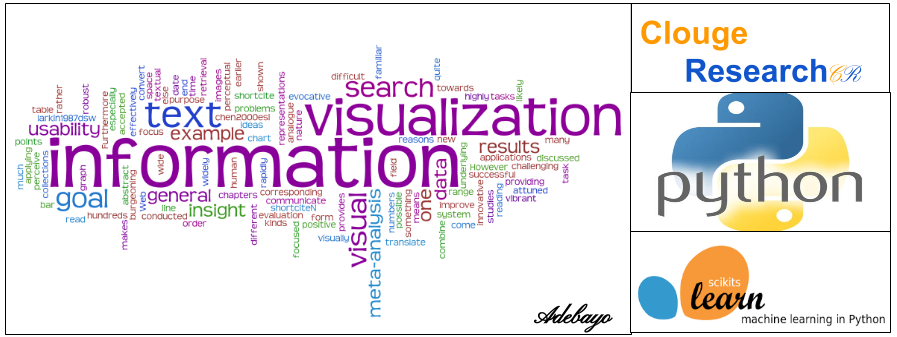

In [8]:
from IPython.display import Image
Image(filename='Analysis.png')

---
# TEXT ANALYSIS AND MACHINE LEARNING PART 1
---
>  ### Recently I worked on a project with a client that requested using tweets to build BI dashboard. With his permission, I decided to use the tweets for _Sentimental Analysis_. The tweets was streaming based on the three keywords namely 'war', 'asylum seeker', and 'middle east'. Any tweet that has two of  the keywords will be classified as negative.

### To do list:
---
* #### The tweets were streaming with keywords: war, asylum seeker and middle east.
* #### Clean the tweets
* #### Label the tweets as _postive_ or _negative_.
   * #### Assummed that if the two of keywords appear in the any of the tweets, the tweets will be classified as _negative_ otherwise _positive_. 
* #### Create instance that will be trained to be used to predict if tweet is negative or positive.

In [3]:
import os
import pandas as pd
import re
import random
import numpy as np
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords

In [5]:
os.getcwd()

'/Users/adebayoakinlalu'

In [7]:
os.listdir(os.curdir)
#os.chdir('desktop/output')

['.DS_Store',
 'Aliases.csv',
 'Analysis.png',
 'database.sqlite',
 'EmailReceivers.csv',
 'Emails.csv',
 'hashes.txt',
 'Persons.csv',
 'SMS.csv',
 'tweet.csv']

In [7]:
os.path.isfile('tweet.csv')

True

In [10]:
df = pd.read_csv('tweet.csv')
'We have %s tweets' % len(df)

'We have 661519 tweets'

In [ ]:
### Create function to view the data randomly
##### Randomly select 10 tweets of 661519 tweets

In [109]:
tweets = df['text'].tolist()
def view(tweets, num):
    '''
    The function view examines tweets randomly
    >>>view(tweets, 3)
    
    Position Number: 196912 | tweet: The great e-cigarette war
    Position Number: 363027 | tweet: The War Of The Roses
    Position Number: 265701 | tweet: nan
    '''
    for i in range(num):
        tweet = random.choice(tweets)
        print 'Position Number: %s | tweet: %s' % (tweets.index(tweet), tweet)
## view the data 
view(tweets, 10)

Position Number: 196912 | tweet: The great e-cigarette war
Position Number: 94225 | tweet: Chilcot to 'spread Iraq war criticism'
Position Number: 67166 | tweet: RT @TheTyee: ICYMI, Harry Smith: Harper's Cultural War on Muslim Women Must End http://t.co/AeQQc8m97l #cdnpoli http://t.co/ghw136scRN
Position Number: 572713 | tweet: G4S bosses admit number of asylum seeker homes with red doors 'too high'
Position Number: 295651 | tweet: nan
Position Number: 340221 | tweet: But like realists tho  https://t.co/6nQK27dxKk
Position Number: 528706 | tweet: @UverySmart I guess it's a personal choice going to war, since there is no draft. And women go to war.
Position Number: 349202 | tweet: https://t.co/Q8LE6sG3OX #blow Volle Ladung Sperma im Mund: Das war geil ich hab ihn... https://t.co/LHxGFqIUX3 https://t.co/V8FDW71Om0 #teen
Position Number: 88 | tweet: nan
Position Number: 553308 | tweet: RT @Hatewatch: Ore. occupier allegedly shot by law enforcement is Ryan Payne, was at Bundy Ranch in ‘14 

### 1. Create Regex function to get Rid of Unwanted
**Unwanted:** @anything, weblinks, non-alphabets

In [168]:
def regex(data):
    '''
    regex uses regular expression to remove:
       @anything, 
       weblinks, 
       non-alphabets
    return lowercap tweets
    data = 'RT @SeriousStrange: Orphans from the Vietnam War being flown to the U.S. in 1975 to be adopted. https://t.co/kIlCjsGqd3'
    >>regex(data) 
    'rt  seriousstrange  orphans from the vietnam war being flown to the u s  in      to be adopted  https   t co kilcjsgqd'
    '''
    regex = re.compile('[^a-zA-Z]')
    data = str(data)
    if data != 'nan':
       data = re.sub(regex, ' ', data)
    return data.lower().strip()

In [138]:
### Test if the regex function works with randomly select 100 tweets out of 

In [169]:
for i in range(10):
    data = random.choice(tweets)
    print 'Position Number: %s | tweet: %s' % (tweets.index(data), regex(data))

Position Number: 35608 | tweet: rt  anupampkher  just recorded an interview with  sardesairajdeep on selective activism  amp  our tweeter war last nite  pls watch it on india
Position Number: 309325 | tweet: nan
Position Number: 510869 | tweet: nan
Position Number: 55321 | tweet: btchyblonde oh jesus  war flashbacks
Position Number: 363027 | tweet: the war of the roses
Position Number: 527381 | tweet: rt  thegotosite  the hidden wounds of war  https   t co lyhxgg sb  https   t co nno  a cxz
Position Number: 269999 | tweet: nan
Position Number: 316512 | tweet: nan
Position Number: 196912 | tweet: the great e cigarette war
Position Number: 546868 | tweet: sleep tech could set off a biological class war https   t co ybyxrs ecj v  a  qz


In [170]:
### include the refined tweets into new columns of the dataset for future use
df['tweet'] = map(lambda x: regex(x), tweets)

### Create list without 'nan'
new_tweets = [tweet for tweet in df['tweet'] if tweet != 'nan']

### new total of number of tweets
print 'Total number of tweets:', len(new_tweets)

Total number of tweets: 444850


In [171]:
### total number of tweets with nan that have removed
'%s of tweets with NAN contents have been removed' % (len(tweets) - len(new_tweets))

'216669 of tweets with NAN contents have been removed'

In [172]:
### To check if the nan has been actually eliminated in the new list
### We randomly select 5 tweets 
for i in range(5):
    view(new_tweets, 5)

Position Number: 94192 | tweet: chilcot to  spread iraq war criticism
Position Number: 373699 | tweet: g s bosses admit number of asylum seeker homes with red doors  too high
Position Number: 58242 | tweet: military experts believe we   re only seconds away from world war three http   t co  r dyn  cx  faf mag
Position Number: 94192 | tweet: chilcot to  spread iraq war criticism
Position Number: 254033 | tweet: rt  rawyarageh  i honestly just can t wrap my mind around  denmark s law allowing seizure of refugees  valuables   hi  you survived war  no
Position Number: 259980 | tweet: the war of the roses
Position Number: 259980 | tweet: the war of the roses
Position Number: 353704 | tweet: rt https   t co cto px zso      low carb f  r die seele  low carb f  r die seele jasmin mengele  autor           ver    https   t co e nysrpjrt
Position Number: 15118 | tweet: stratfor russia has no plans to get involved deeply in the conflict in the middle east  the goal of inflict maximum damage to the

### 2. Label the tweets

In [178]:
middle_east = ['egypt', 'eyptian', 'iran', 'iranian', 'turkey', 'turkish', 'iraq', 'iraqi', 'saudi arabia', 'saudi', 'yemen', 'yemeni',
               'syria', 'syrian', 'united arab emirates', 'emirati', 'israel', 'israeli', 'jordan', 'jordanian', 'palestine', 'palestinian', 
               'lebanon', 'lebanese', 'oman','omani', 'kuwait', 'kuwaiti',  'qatar', 'qatari', 'bahrain', 'bahraini', 'middle east', 'middle eastian']

local_stopwords = ['htt', 'http', 'https', 'rt']

def checkForCountries(tweet, middle_east):
    for country in middle_east:
        if country in tweet:
             return True
            
def removeStopwordNstemmer(tweet):
    '''
    Stopwords usually refer to the most common words in a language, there is no single universal list of stop words used 
    by all natural language processing tools.
    
    Stemming is the term used in linguistic morphology and information retrieval to describe the process for reducing inflected 
    words to their word stem.
    text = 'rt  strong words from UK Syria envoy condemning Russia military action war on the Syrian people'
    >>> removeStopwordNstemmer('words')
    'strong word uk syria envoy condemn russia militari action war syrian peopl'
    '''
    text = ''
    stemmer = PorterStemmer()
    stop_words = stopwords.words('english')
    tweet = tweet.strip().split()
    for item in tweet:
        if (item not in stop_words) and (item not in local_stopwords):
            text = text+ ' ' +stemmer.stem(item)
    return text
    
    
            
def labelTweets(tweets, middle_east):
    '''
    tweets is a list
    middle_east is a list
    tweets = ['Sure', 'RT  A stabbing war born of Palestinian hysterical intolerance ',
    'rt  strong words from UK Syria envoy condemning Russia military action \n\n\xe2\x80\x9cA war on the Syrian people" htt\xe2\x80\xa6' ]
    >>> print labelTweets(tweets, middle_east) 
    {'Sure': 'positive',
    'RT  A stabbing war born of Palestinian hysterical intolerance ': 'negative',
    'RT  : 'negative
    }
    
    '''
    Tweets = {}
    
    for tweet in tweets:
        tweet= removeStopwordNstemmer(tweet)
        if ('war' in tweet and checkForCountries(tweet, middle_east)) or \
    ('asylum seeker' in tweet and checkForCountries(tweet, middle_east)) or \
    ('asylum seeker' in tweet and 'middle east' in tweet):
            Tweets[tweet] = 'negative'
        else:
            Tweets[tweet] = 'positive'
    return Tweets  

In [179]:
#### Check if it is well label
labelTweets(new_tweets[:10], middle_east)

{u' awfulread tsundererag yeefi sure co kbf nv q': 'positive',
 u' bibisbeauti sooo dank aber ich hoff da geht wieder ab co arratc tau': 'positive',
 u' charl lister strong word uk syria envoy garethbayley condemn russia militari action war syrian peopl': 'negative',
 u' love amp war co k k qupi line': 'positive',
 u' middl east israel vibrat joekiusya mbaitufm reggaesasa': 'positive',
 u' rrolyat anyth worth worth fight realli want thing work gotta go war': 'positive',
 u' susanneur vanish canada re loser ottawa war data co dsvrrw uhr': 'positive',
 u' wait second ignor co qwisaxxcfv': 'positive',
 u' yaacovlozowick stab war born palestinian hyster intoler co oaejg pjx via timesofisrael': 'negative',
 u' youtub co nytokd hc documentari film yom kippur war': 'positive'}

##### To be continued... There are better ways to labels the tweets

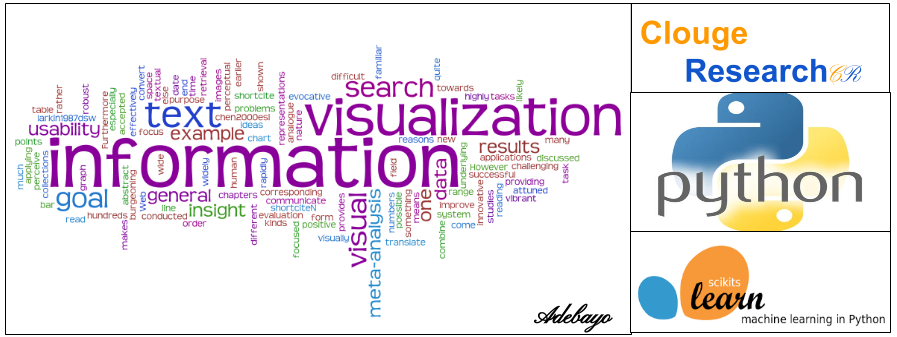

In [9]:
Image(filename='Analysis.png')